<a href="https://colab.research.google.com/github/Surajk7725/OpenCV/blob/main/OpenCV_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Getting Started with Images**

This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, you will learn the following:


*   Reading an image
*   Check image attributes like datatype and shape
*   Matrix representation of an image in Numpy
*   Displaying images using matplotlib
*   Splitting/Merging image channels   
*   Saving images

**Import Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

**Summoning a Image**

I will use the one of my image as our sample image. We will use the ipython image function to load and display the image.

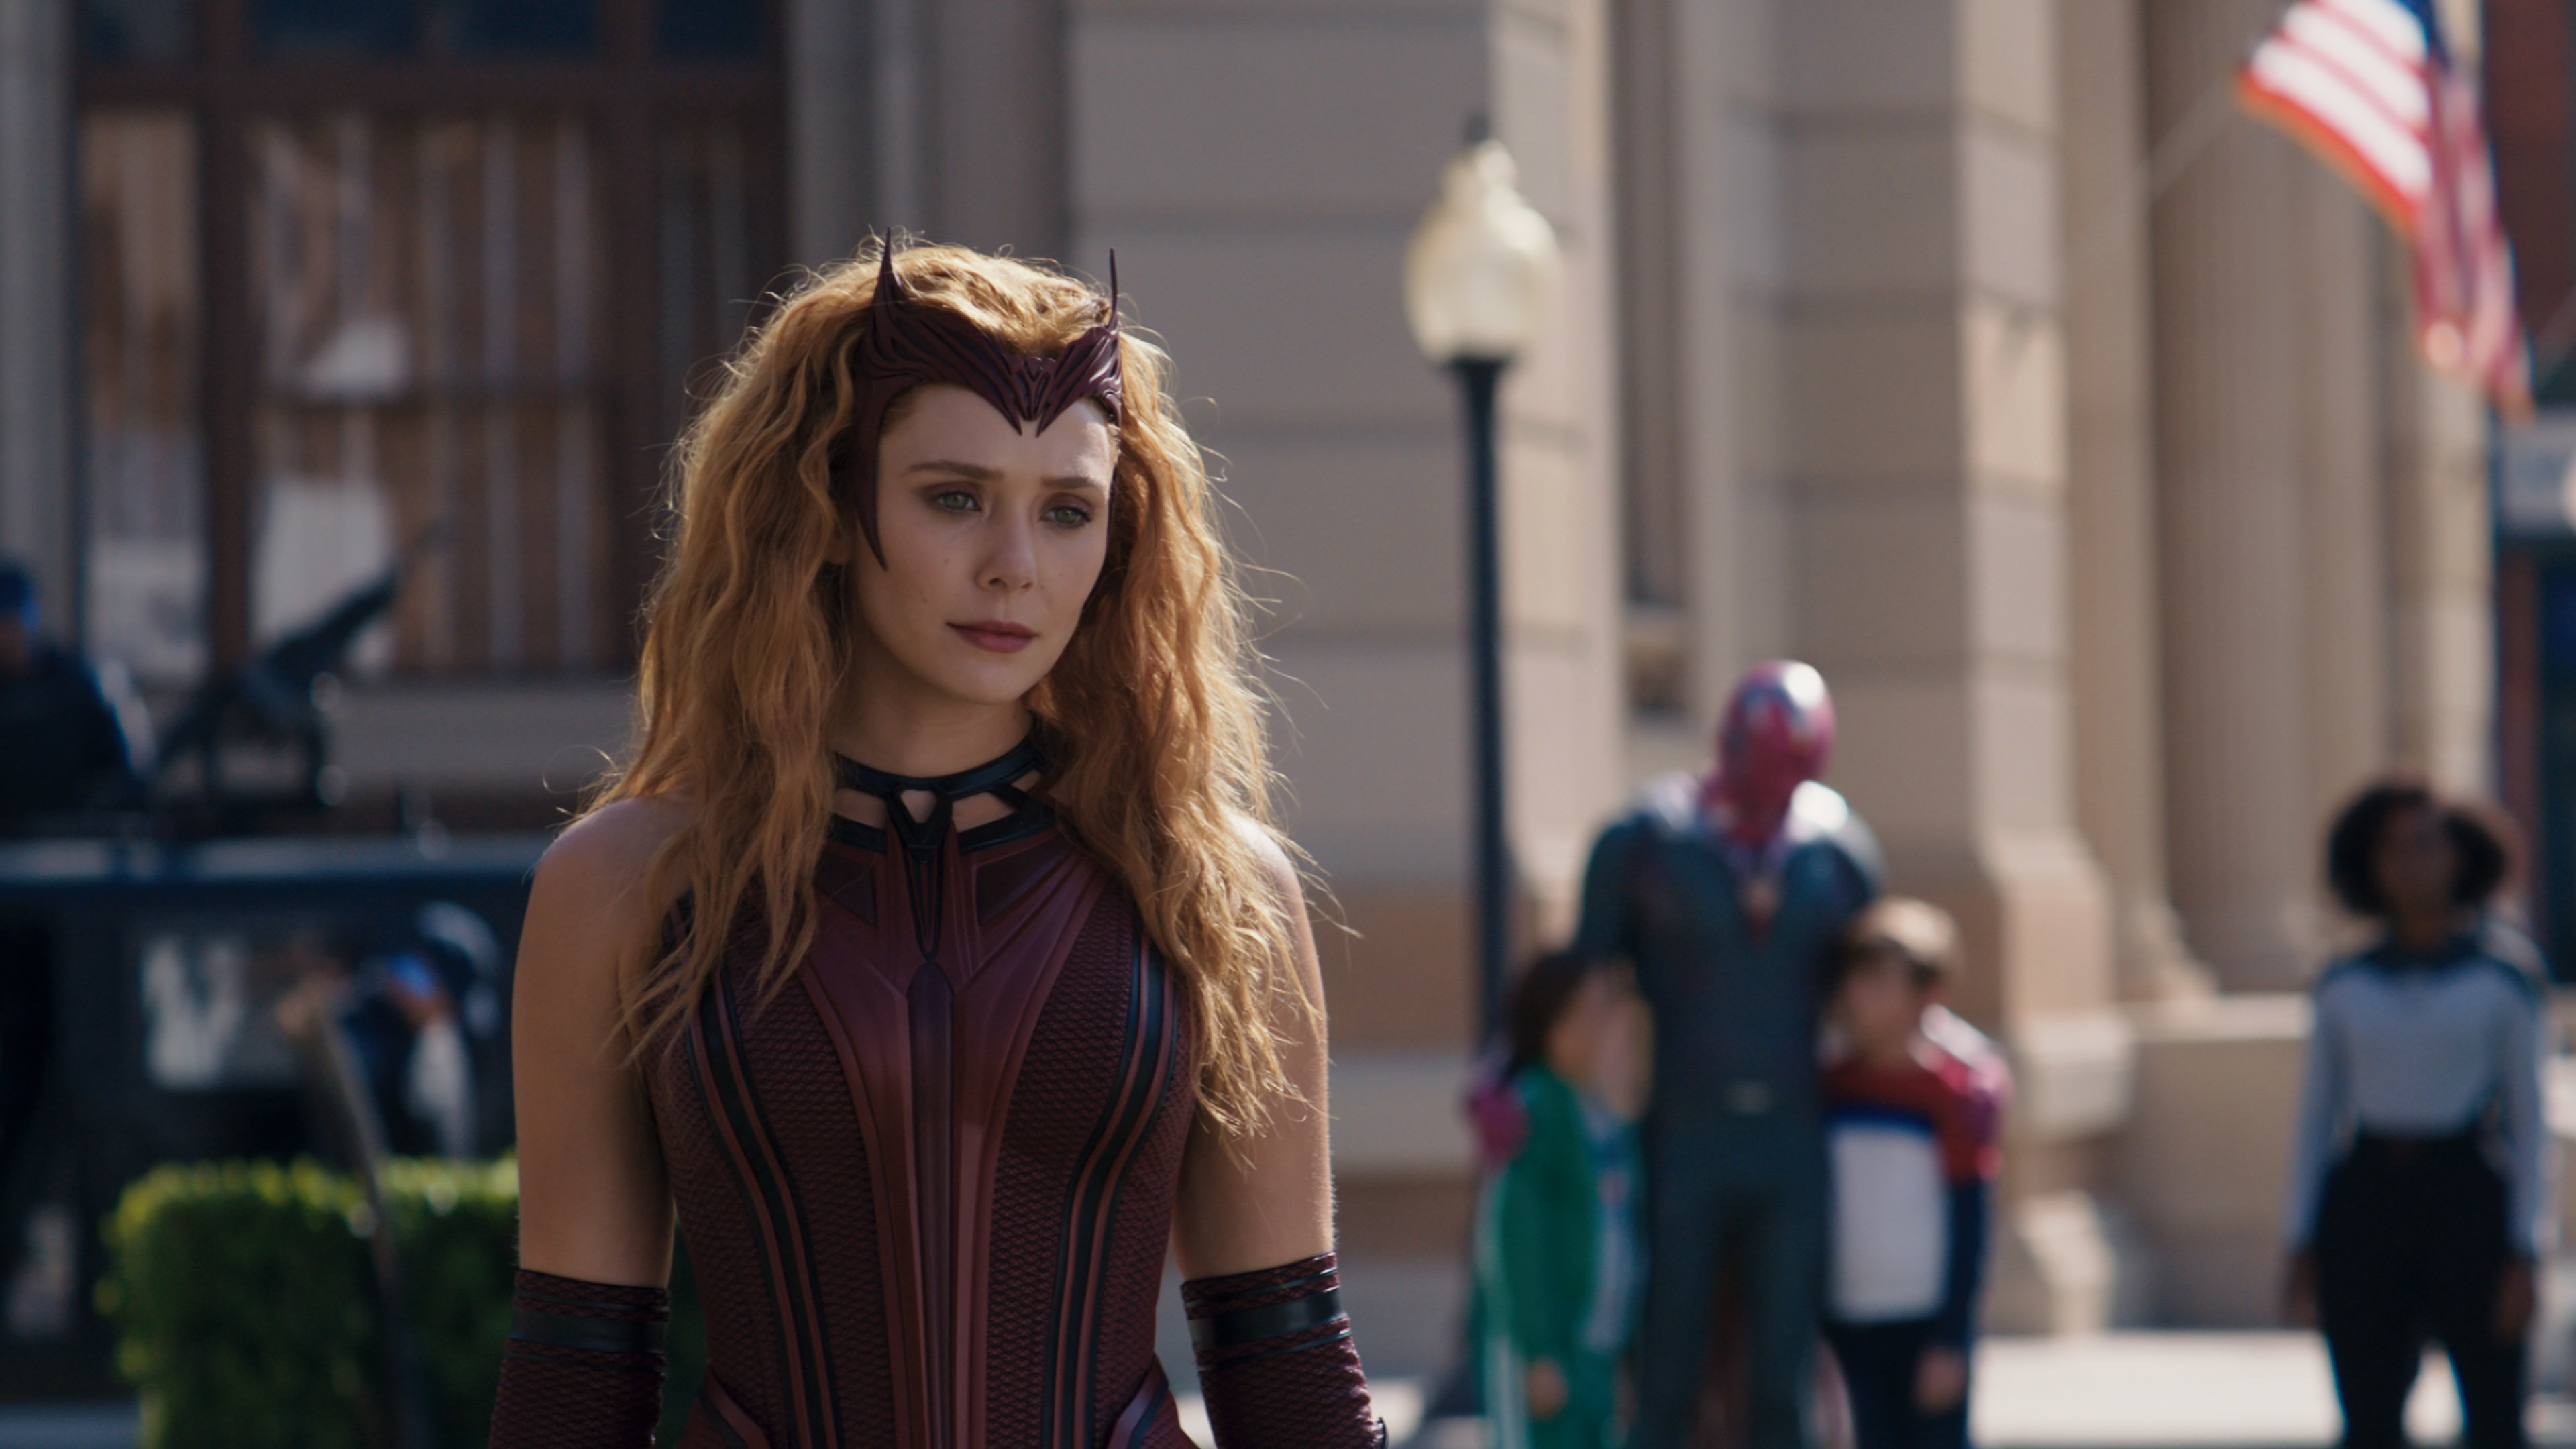

In [ ]:
Image(filename="49.jpg")

**Reading images using OpenCV**

1.   OpenCV allows reading different types of images (JPG, PNG, etc).
2.   You can load grayscale images, color images or you can also load images with Alpha channel.
3.   It uses the `cv2.imread()` function which has the following syntax:
         img_cv = cv2.imread( filename[, flags] )

where,

1.  img_cv = Is the image if it is successfully loaded. Otherwise, it is `None`. This may happen if the filename is wrong or the file is corrupt.
2.  filename =  This can be an absolute or relative path of an image.
3.  flags = These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel).

Some flags include:

1.  **cv2.IMREAD_GRAYSCALE or 0:** Loads image in grayscale mode
2. **cv2.IMREAD_COLOR or 1:** Loads a color image. Any transparency of image will be neglected. It is the default flag.
3.  **cv2.IMREAD_UNCHANGED or -1:** Loads image as such including alpha channel.











In [ ]:
image = cv2.imread("49.jpg",0)
print(image)

[[87 88 89 ... 54 55 55]
 [87 88 89 ... 55 55 55]
 [87 88 89 ... 55 55 56]
 ...
 [57 57 58 ... 83 83 83]
 [56 56 56 ... 82 82 82]
 [55 55 55 ... 81 81 81]]


**Display Image Attributes**

In [ ]:
# For Grayscale it has only Height and Width
# For Color Image it has Height, Weight and No.of Channels
print("Image size (H, W) is:", image.shape)

print("Data type of image is:", image.dtype)

Image size (H, W) is: (2160, 3840)
Data type of image is: uint8


1. `cv2.IMREAD_GRAYSCALE or 0`: If the image is loaded in grayscale mode, image.shape will return a tuple (height, width) because there is only one channel (grayscale) in the image.
2. `cv2.IMREAD_COLOR or 1`: If the image is loaded as a color image, image.shape will return a tuple (height, width, 3) because color images have three channels (Red, Green, Blue).
3. `cv2.IMREAD_UNCHANGED or -1`: If the image is loaded with the alpha channel (transparency) included, image.shape will return a tuple (height, width, 4) because there are four channels (Red, Green, Blue, Alpha).  

Note:- For some images `cv2.IMREAD_UNCHANGED or -1` gives image.shape(H,W,3).

**Display Image Using Matplotlib**

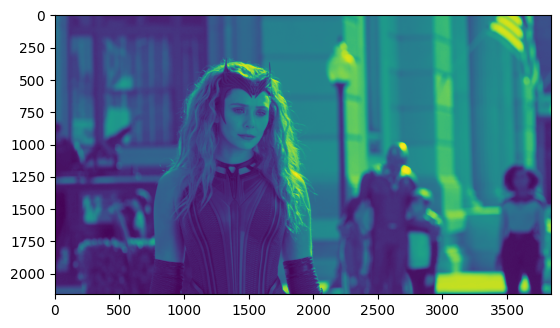

In [ ]:
plt.imshow(image) #the image was read in as a gray scale image

**What Happened?**

Matplotlib uses different color maps and it's possible that the gray scale color map is not set.

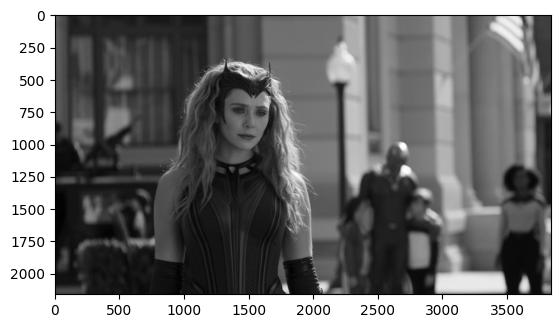

In [ ]:
# Set color map to gray scale for proper rendering.
plt.imshow(image, cmap="gray")

**Read and Display Color Image**

Let us read a color image and check the parameters. Note the image dimension.

In [ ]:
anime_img = cv2.imread("86.jpg", 1)

# print the size  of image
print("Image size (H, W, C) is:", anime_img.shape)

# print data-type of image
print("Data type of image is:", anime_img.dtype)

Image size (H, W, C) is: (2160, 3840, 3)
Data type of image is: uint8


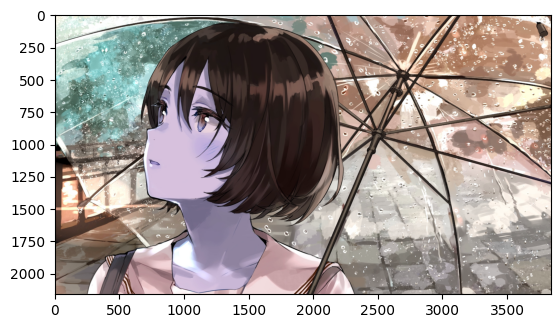

In [ ]:
plt.imshow(anime_img)

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

There are two ways to convert the BGR Image into RGB Image.
1.   new_img = old_img[:, :, ::-1]. then print new_img
2.   new_img = cv2.cvtColor(old_img, cv2.COLOR_BGR2RGB)



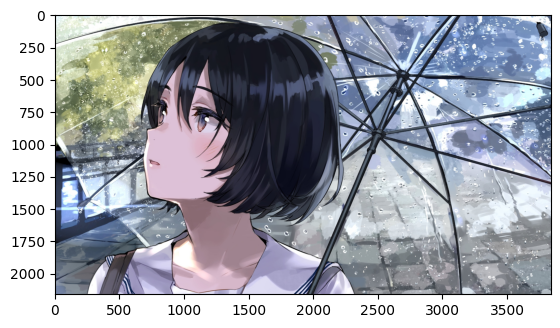

In [19]:
new_anime = anime_img[:, :, ::-1]
plt.imshow(new_anime)

**Splitting and Merging Color Channels**

1.   `cv2.split()`: Divides a multi-channel array into several single-channel arrays.
2.   `cv2.merge()` : Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.



Text(0.5, 1.0, 'Blue Channel')

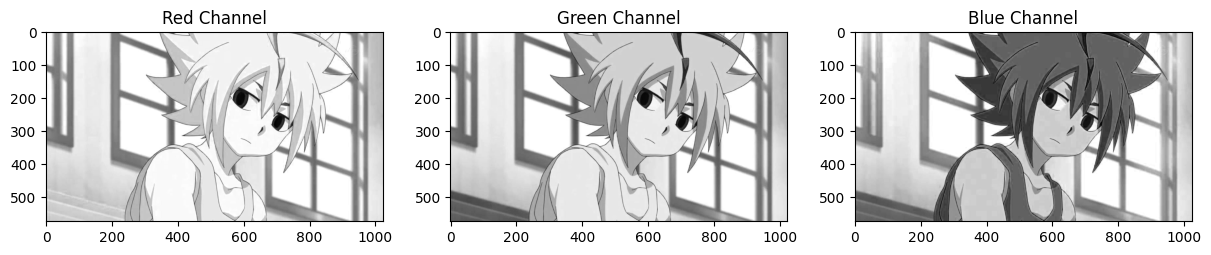

In [20]:
free = cv2.imread("2.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(free)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);
plt.imshow(r, cmap="gray");
plt.title("Red Channel")

plt.subplot(142);
plt.imshow(g, cmap="gray");
plt.title("Green Channel")

plt.subplot(143);
plt.imshow(b, cmap="gray");
plt.title("Blue Channel")


Text(0.5, 1.0, 'Blue Channel')

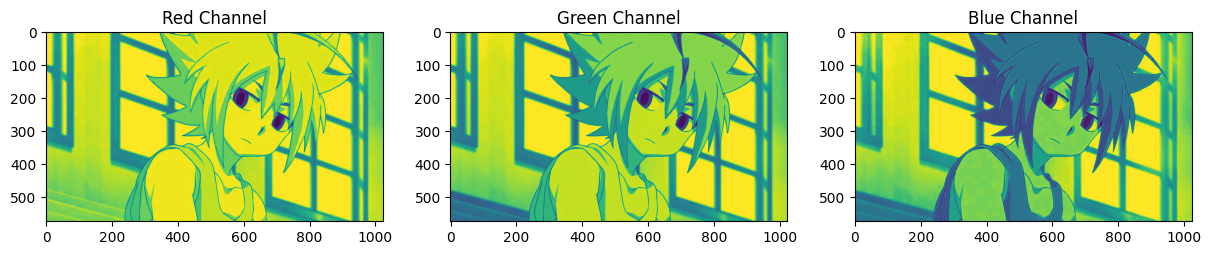

In [21]:
free = cv2.imread("2.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(free)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);
plt.imshow(r);
plt.title("Red Channel")

plt.subplot(142);
plt.imshow(g);
plt.title("Green Channel")

plt.subplot(143);
plt.imshow(b);
plt.title("Blue Channel")

Text(0.5, 1.0, 'Merged Output')

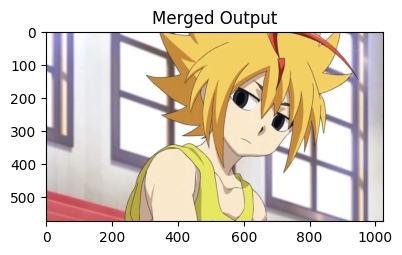

In [27]:
free_merge = cv2.merge((b, g, r))

plt.figure(figsize=[20, 5])

# Show the merged output
plt.subplot(144)
plt.imshow(free_merge[:, :, ::-1])
plt.title("Merged Output")

**Example of Splitting And Merging An Image**

Text(0.5, 1.0, 'Merged Output')

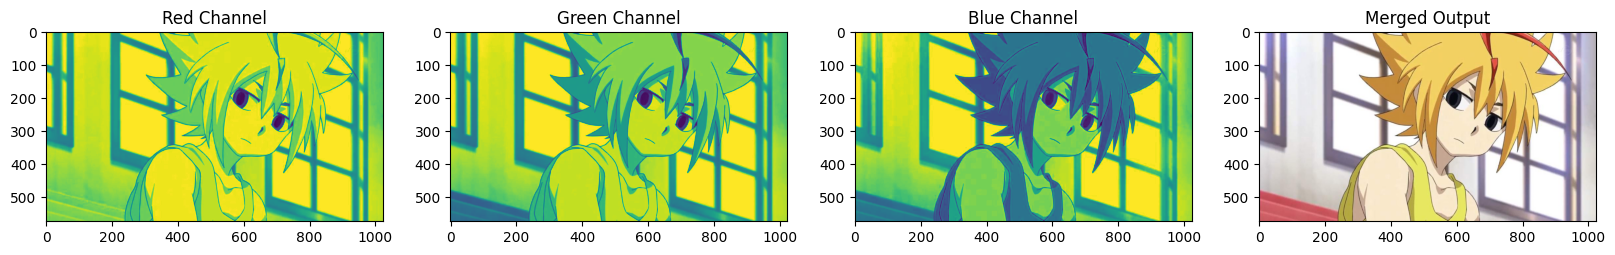

In [25]:
free = cv2.imread("2.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(free)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);
plt.imshow(r);
plt.title("Red Channel")

plt.subplot(142);
plt.imshow(g);
plt.title("Green Channel")

plt.subplot(143);
plt.imshow(b);
plt.title("Blue Channel")


free_merge = cv2.merge((b, g, r))

# Show the merged output
plt.subplot(144)
plt.imshow(free_merge[:, :, ::-1])
plt.title("Merged Output")

**Saving Images**

Saving the image is as trivial as reading an image in OpenCV. We use the function `cv2.imwrite()` with two arguments. The first one is the filename, second argument is the image object.

In [28]:
save_img = cv2.imwrite("hoya.jpg",free)

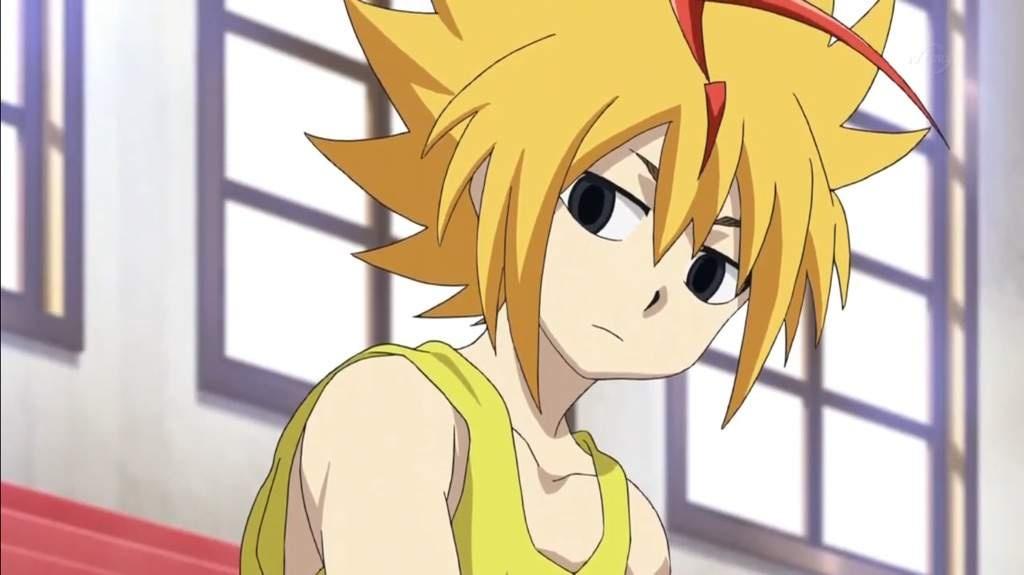

In [29]:
Image(filename="hoya.jpg")

**Annotating Images**

In this notebook we will cover how to annotate images using OpenCV. We will learn how to peform the following annotations to images.
*   Draw lines
*   Draw circles
*   Draw rectangles
*   Add text



**Drawing a Line**

***Function Syntax***  :  img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

where,
1.   *`img`*: Image on which we will draw a line
2.   *`pt1`*: First point(x,y location) of the line segment
1.   *`pt2`*: Second point of the line segment
2.   *`color`*: Color of the line which will be drawn





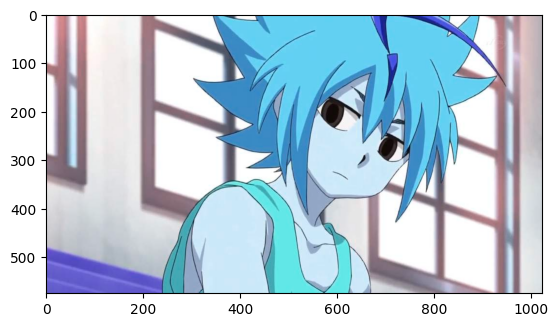

In [56]:
free_copy = free.copy() # Make a copy of the image stored in the variable 'free' and store it in the variable 'free_copy'
plt.imshow(free_copy)

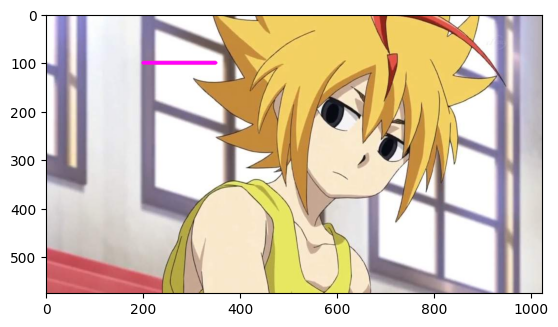

In [61]:
cv2.line(free_copy, (200, 100), (350, 100), (255, 0, 255), thickness=5, lineType=cv2.LINE_AA);
plt.imshow(free_copy[:,:,::-1])

**Drawing a Circle**

***Function Syntax*** : img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
1.   *`img`*: Image on which we will draw a line
1.   *`center`*: Center of the circle which is in (x,y) direction.
2.   *`radius`*: Radius of the circle
2.   *`color`*: Color of the circle which will be drawn



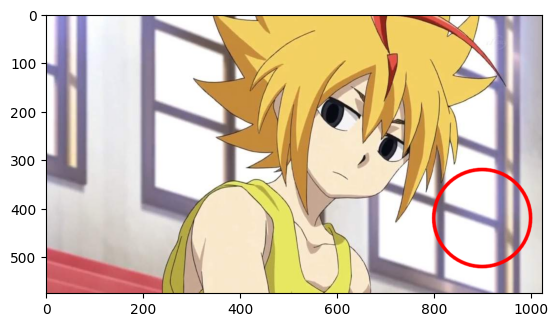

In [65]:
alpha_img = free.copy()

cv2.circle(alpha_img, (900,420), 100, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);
plt.imshow(alpha_img[:,:,::-1])

**Drawing a Rectangle**

***Function Syntax*** : img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
1.   *`img`*: Image on which the rectangle is to be drawn.
1.   *`pt1`*: Vertex of the rectangle. Usually we use the top-left vertex here.
2.   *`pt2`*: Vertex of the rectangle opposite to pt1. Usually we use the bottom-right vertex here.
2.   *`color`*: Rectangle color



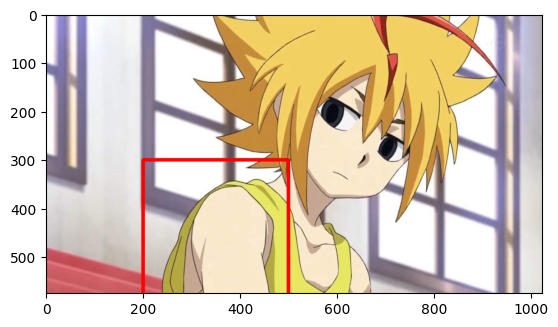

In [74]:
beta_img = free.copy()

cv2.rectangle(beta_img, (200, 300), (500, 600), (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);
plt.imshow(beta_img[:,:,::-1])

**Adding Text**

***Function Syntax*** : img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
1.   *`img`*: Image on which the text has to be written.
1.   *`text`*: Text string to be written.
1.   *`org`*: Bottom-left corner of the text string in the image.
2.   *`fontFace`*: Font type
2.   *`fontScale`*: Font scale factor that is multiplied by the font-specific base size.
2.   *`color`*: Font color



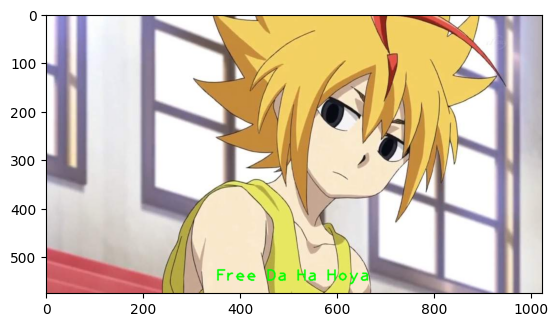

In [80]:
imageText = free.copy()
text = "Free Da Ha Hoya"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2

cv2.putText(imageText, text, (350, 550), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

# Display the image
plt.imshow(imageText[:, :, ::-1])